# Movielens 20M

Informację nt. zbioru danych -> http://files.grouplens.org/datasets/movielens/ml-20m-README.html

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
movies_data = pd.read_csv('../ml-20m/movies.csv', header=0)

In [3]:
ratings_data = pd.read_csv('../ml-20m/ratings.csv', header=0)

In [4]:
tags_data = pd.read_csv('../ml-20m/tags.csv', header=0)

In [5]:
movies_and_tags = pd.merge(movies_data, tags_data)

In [6]:
movielens = pd.merge(movies_data, ratings_data)

In [7]:
ratings_data['datetime'] = pd.to_datetime(ratings_data.timestamp, unit='s')
ratings_data['year'] = ratings_data.datetime.dt.year
ratings_data['month'] = ratings_data.datetime.dt.month
ratings_data['weekday'] = ratings_data.datetime.dt.weekday_name

## Podstawowe metryki

In [8]:
len(movies_data) # ilość filmów

27278

In [9]:
len(ratings_data.groupby('userId')) # ilość userów

138493

In [10]:
len(ratings_data) # ilość ocen

20000263

In [11]:
len(tags_data) # ilość tagów

465564

## Sprawdzanie szumów

In [12]:
movies_data.groupby('title').size().sort_values(ascending=False)[:20]

title
Offside (2006)                                                                                       2
Darling (2007)                                                                                       2
Girl, The (2012)                                                                                     2
Blackout (2007)                                                                                      2
Men with Guns (1997)                                                                                 2
Casanova (2005)                                                                                      2
Beneath (2013)                                                                                       2
Clear History (2013)                                                                                 2
Johnny Express (2014)                                                                                2
Chaos (2005)                                                       

In [13]:
ratings_data.groupby(['userId', 'movieId']).size().sort_values(ascending=False)[:5]

userId  movieId
138493  71619      1
45917   2706       1
        2424       1
        2468       1
        2558       1
dtype: int64

### W zbiorze filmów jest 16 filmów które się powtarzają

## Analiza danych o ocenach filmów

### Metryki statystyczne ocen

In [14]:
ratings_data.rating.describe()

count    2.000026e+07
mean     3.525529e+00
std      1.051989e+00
min      5.000000e-01
25%      3.000000e+00
50%      3.500000e+00
75%      4.000000e+00
max      5.000000e+00
Name: rating, dtype: float64

rating
0.5     239125
1.0     680732
1.5     279252
2.0    1430997
2.5     883398
3.0    4291193
3.5    2200156
4.0    5561926
4.5    1534824
5.0    2898660
dtype: int64


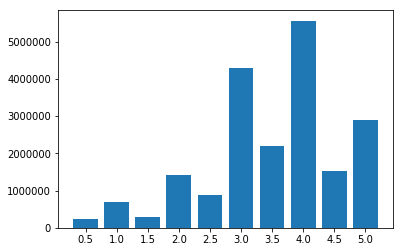

In [15]:
grouped_ratings = movielens.groupby('rating').size()
print(grouped_ratings)

x = range(len(grouped_ratings))

plt.bar(x, grouped_ratings)
plt.xticks(x, grouped_ratings.keys())
plt.show()

### 25 najczęściej ocenianych filmów

In [16]:
movielens.title.value_counts()[:25]

Pulp Fiction (1994)                                                               67310
Forrest Gump (1994)                                                               66172
Shawshank Redemption, The (1994)                                                  63366
Silence of the Lambs, The (1991)                                                  63299
Jurassic Park (1993)                                                              59715
Star Wars: Episode IV - A New Hope (1977)                                         54502
Braveheart (1995)                                                                 53769
Terminator 2: Judgment Day (1991)                                                 52244
Matrix, The (1999)                                                                51334
Schindler's List (1993)                                                           50054
Toy Story (1995)                                                                  49695
Fugitive, The (1993)            

### 25 najlepiej ocenianych filmów

In [17]:
movie_ratings = movielens.groupby('title').agg({'rating': [np.size, np.mean]})
movie_ratings.sort_values([('rating', 'size')])
at_least_100_ratings = movie_ratings['rating']['size'] >= 100
movie_ratings[at_least_100_ratings].sort_values([('rating', 'mean')], ascending=False)[:25]

rating          
                                                       size      mean
title                                                                
Shawshank Redemption, The (1994)                    63366.0  4.446990
Godfather, The (1972)                               41355.0  4.364732
Usual Suspects, The (1995)                          47006.0  4.334372
Schindler's List (1993)                             50054.0  4.310175
Godfather: Part II, The (1974)                      27398.0  4.275641
Seven Samurai (Shichinin no samurai) (1954)         11611.0  4.274180
Rear Window (1954)                                  17449.0  4.271334
Band of Brothers (2001)                              4305.0  4.263182
Casablanca (1942)                                   24349.0  4.258327
Sunset Blvd. (a.k.a. Sunset Boulevard) (1950)        6525.0  4.256935
One Flew Over the Cuckoo's Nest (1975)              29932.0  4.248079
Dr. Strangelove or: How I Learned to Stop Worry...  23220.0  4.247287
Third Man, The (1949)                                6565.0  4.246002
City of God (Cidade de Deus) (2002)                 12937.0  4.235410
Lives of Others, The (Das leben der Anderen) (2...   5720.0  4.234790
North by Northwest (1959)                           15627.0  4.233538
Paths of Glory (1957)                                3568.0  4.232623
Fight Club (1999)                                   40106.0  4.227123
Double Indemnity (1944)                              4909.0  4.224282
12 Angry Men (1957)                                 12934.0  4.224138
Cosmos (1980)                                         936.0  4.220620
Dark Knight, The (2008)                             20438.0  4.220129
Raiders of the Lost Ark (Indiana Jones and the ...  43295.0  4.219009
Yojimbo (1961)                                       3559.0  4.211717
Big Sleep, The (1946)                                5529.0  4.207361

### Metryki statystyczne ilości ocen w ujęciu użytkowników

In [18]:
movielens.groupby('userId').size().describe()

count    138493.000000
mean        144.413530
std         230.267257
min          20.000000
25%          35.000000
50%          68.000000
75%         155.000000
max        9254.000000
dtype: float64

## Oceny w czasie

### Ilość ocen na przestrzeni lat

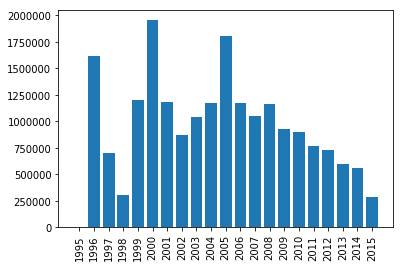

In [19]:
ratings_per_years = ratings_data.groupby('year').size()

x = range(len(ratings_per_years))
plt.bar(x, ratings_per_years)
plt.xticks(x, ratings_per_years.keys(), rotation=90)
plt.show()

### Ilośc ocen na przestrzeni miesięcy

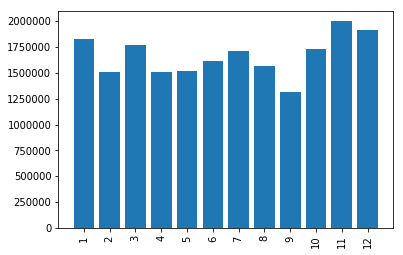

In [20]:
ratings_per_month = ratings_data.groupby('month').size()

x = range(len(ratings_per_month))
plt.bar(x, ratings_per_month)
plt.xticks(x, ratings_per_month.keys(), rotation=90)
plt.show()

### Ilość ocen na przestrzeni dni tygodnia

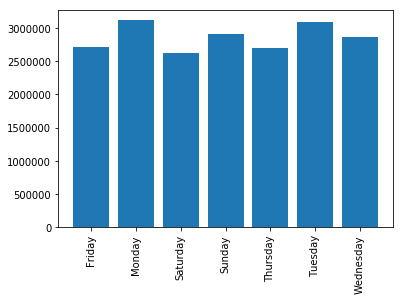

In [21]:
ratings_per_weekday = ratings_data.groupby('weekday').size()

x = range(len(ratings_per_weekday))
plt.bar(x, ratings_per_weekday)
plt.xticks(x, ratings_per_weekday.keys(), rotation=90)
plt.show()

## Analiza tagów nadanych przez użytkoników

### Ilość tagów per user

In [22]:
tags_data.groupby('userId').size().describe()

count     7801.000000
mean        59.680041
std        414.804414
min          1.000000
25%          2.000000
50%          4.000000
75%         20.000000
max      20356.000000
dtype: float64

### Ilość tagów per film

In [23]:
tags_data.groupby('movieId').size().describe()

count    19545.000000
mean        23.820107
std         70.071439
min          1.000000
25%          2.000000
50%          5.000000
75%         16.000000
max       1994.000000
dtype: float64

### Najpopularniejsze tagi

In [24]:
tags_data.groupby('tag').size().sort_values(ascending=False)[:10]

tag
sci-fi             3384
based on a book    3281
atmospheric        2917
comedy             2779
action             2657
surreal            2427
BD-R               2334
twist ending       2323
funny              2072
dystopia           1991
dtype: int64

### Najpopularniejsze tagowane filmy

In [25]:
movies_and_tags.groupby(['title']).size().sort_values(ascending=False)[:10]

title
Pulp Fiction (1994)                             1994
Fight Club (1999)                               1779
Inception (2010)                                1552
Matrix, The (1999)                              1430
Shawshank Redemption, The (1994)                1339
Eternal Sunshine of the Spotless Mind (2004)    1240
Donnie Darko (2001)                             1177
Memento (2000)                                  1168
Silence of the Lambs, The (1991)                1100
Avatar (2009)                                    995
dtype: int64